## Reading Data

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/veri/marketing_campaign.csv', sep='\t')

In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


## General View

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [ ]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

## New Columns

In [ ]:
df['AcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] 

In [ ]:
df.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5'], axis=1, inplace=True)

In [ ]:
df['MntProtein'] = df['MntFishProducts'] + df['MntMeatProducts']

In [ ]:
df.drop(['MntFishProducts','MntMeatProducts'], axis=1, inplace=True)

In [ ]:
df['Age'] = 2022 - df['Year_Birth']

In [ ]:
def age_class(age):
  if age < 18:
    return "child"
  elif age >= 18 and age < 30:
    return "young"
  elif age >= 30 and age < 50:
    return "adult"
  elif age >= 50 and age < 60:
    return "middle_aged"
  elif age >= 60:
    return "old" 

df['Youth'] = df['Age'].apply(age_class)

In [ ]:
df['Children'] = df['Kidhome'] + df['Teenhome']

In [ ]:
df.drop(['Year_Birth', 'Teenhome', 'Kidhome'], axis=1, inplace=True)

In [ ]:
df.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True) #tüm samplelarda aynı sayıyı aldfıgı için gereksiz ve attık

In [ ]:
df

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,AcceptedCmp,MntProtein,Age,Youth,Children
0,5524,Graduation,Single,58138.0,04-09-2012,58,635,88,88,88,3,8,10,4,7,0,1,0,718,65,old,0
1,2174,Graduation,Single,46344.0,08-03-2014,38,11,1,1,6,2,1,1,2,5,0,0,0,8,68,old,2
2,4141,Graduation,Together,71613.0,21-08-2013,26,426,49,21,42,1,8,2,10,4,0,0,0,238,57,middle_aged,0
3,6182,Graduation,Together,26646.0,10-02-2014,26,11,4,3,5,2,2,0,4,6,0,0,0,30,38,adult,1
4,5324,PhD,Married,58293.0,19-01-2014,94,173,43,27,15,5,5,3,6,5,0,0,0,164,41,adult,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,13-06-2013,46,709,43,118,247,2,9,3,4,5,0,0,0,224,55,middle_aged,1
2236,4001,PhD,Together,64014.0,10-06-2014,56,406,0,0,8,7,8,2,5,7,0,0,1,30,76,old,3
2237,7270,Graduation,Divorced,56981.0,25-01-2014,91,908,48,12,24,1,2,3,13,6,0,0,1,249,41,adult,0
2238,8235,Master,Together,69245.0,24-01-2014,8,428,30,30,61,2,6,5,10,3,0,0,0,294,66,old,1


## Outlier Analysis

In [ ]:
#Tukey's method
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss

In [ ]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "Income")
print(probable_outliers_tm)
print(possible_outliers_tm)

[2233]
[164, 617, 655, 687, 1300, 1653, 2132, 2233]


In [ ]:
for ind in probable_outliers_tm:
  df.at[ind,'Income']= df['Income'].mean()

In [ ]:
for ind in possible_outliers_tm:  # gelirleri kişinin eğitim durumuna bakıp o eğiitm durumunun ortalaması ile doldurdık
  df.at[ind,'Income'] = df[df['Education'] == df['Education'][ind]]['Income'].mean()

In [ ]:
na_list = list(df[df['Income'].isna() == True].index)

In [ ]:
for ind in na_list:
  df.at[ind,'Income'] = df[df['Education'] == df['Education'][ind]]['Income'].mean()

In [ ]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "Age")
print(probable_outliers_tm)
print(possible_outliers_tm)

[192, 239, 339]
[192, 239, 339]


In [ ]:
print(df['Age'][192],
      df['Age'][239],
      df['Age'][339])


122 129 123


In [ ]:
q1=df['Age'].quantile(0.25)   ##year birthleri ceyrekle doldurduk
q3 = df['Age'].quantile(0.75)
iqr = q3-q1
inner_fence = 1.5*iqr

In [ ]:
upper = q3+inner_fence
upper # max kabul edilebilen yaş

90.0

In [ ]:
for ind in probable_outliers_tm:
  df.at[ind,'Age']= upper

In [ ]:
from datetime import datetime
def str2time(str_date):
  date_time_str = str_date
  date_time_obj = datetime.strptime(date_time_str, '%d-%m-%Y')
  tmp = datetime.now() - date_time_obj
  tmp = str(tmp)
  return int(tmp.split()[0]) 

In [ ]:
df['Passed_Time'] = df['Dt_Customer'].apply(str2time)

In [ ]:
df['Passed_Time']

0       3398
1       2848
2       3047
3       2874
4       2896
        ... 
2235    3116
2236    2754
2237    2890
2238    2891
2239    3357
Name: Passed_Time, Length: 2240, dtype: int64

In [ ]:
df = df[df['Recency'] < df['Passed_Time']] # kaydolma tarihinden daha önce alışveriş varsa atılır ve yokmuş

In [ ]:
df.drop(['Dt_Customer'], axis=1, inplace=True)

In [ ]:
df

,ID,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,AcceptedCmp,MntProtein,Age,Youth,Children,Passed_Time
0,5524,Graduation,Single,58138.0,58,635,88,88,88,3,8,10,4,7,0,1,0,718,65,old,0,3398
1,2174,Graduation,Single,46344.0,38,11,1,1,6,2,1,1,2,5,0,0,0,8,68,old,2,2848
2,4141,Graduation,Together,71613.0,26,426,49,21,42,1,8,2,10,4,0,0,0,238,57,middle_aged,0,3047
3,6182,Graduation,Together,26646.0,26,11,4,3,5,2,2,0,4,6,0,0,0,30,38,adult,1,2874
4,5324,PhD,Married,58293.0,94,173,43,27,15,5,5,3,6,5,0,0,0,164,41,adult,1,2896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,46,709,43,118,247,2,9,3,4,5,0,0,0,224,55,middle_aged,1,3116
2236,4001,PhD,Together,64014.0,56,406,0,0,8,7,8,2,5,7,0,0,1,30,76,old,3,2754
2237,7270,Graduation,Divorced,56981.0,91,908,48,12,24,1,2,3,13,6,0,0,1,249,41,adult,0,2890
2238,8235,Master,Together,69245.0,8,428,30,30,61,2,6,5,10,3,0,0,0,294,66,old,1,2891


## Analysis

### ID




In [ ]:
df['ID'].nunique()

2240

### Age / Youth 

*   aşırı yaşlılar outlier analizi ile gidebilir, gitmezse atılabilir +++
*   yaş ve alışverişi ne şekilde (internet vs. mağaza) yaptığı analizi yapılabilir+
*   yaş ve yatırım yapma miktarı (alınan altın) karşılaştırılabilir+
*   sitenin yaş dağılımı nedir?4
*



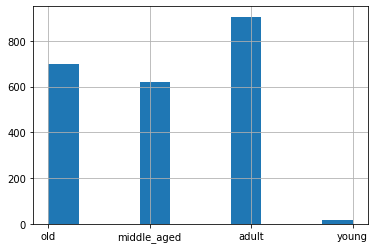

In [ ]:
df['Youth'].hist()

In [ ]:
youth_gb = df.groupby('Youth')
youth_gb.mean()['NumWebPurchases'] #internetten yapılan alısverislerin yaş gruplarıyla oranı

Youth
adult          3.642384
middle_aged    4.237097
old            4.532189
young          3.666667
Name: NumWebPurchases, dtype: float64

In [ ]:
youth_gb = df.groupby('Youth')
youth_gb.mean()['MntGoldProds'] #altına gecler daha cok yatırım yapmış

Youth
adult          39.320088
middle_aged    44.366129
old            49.264664
young          69.466667
Name: MntGoldProds, dtype: float64

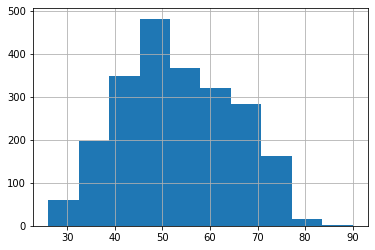

In [ ]:
df['Age'].hist() #yaslar normal dagılıma yakın dagılmıs ve 50 civarlarında dagılmış

In [ ]:
df

,ID,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,AcceptedCmp,MntProtein,Age,Youth,Children,Passed_Time
0,5524,Graduation,Single,58138.0,58,635,88,88,88,3,8,10,4,7,0,1,0,718,65,old,0,3398
1,2174,Graduation,Single,46344.0,38,11,1,1,6,2,1,1,2,5,0,0,0,8,68,old,2,2848
2,4141,Graduation,Together,71613.0,26,426,49,21,42,1,8,2,10,4,0,0,0,238,57,middle_aged,0,3047
3,6182,Graduation,Together,26646.0,26,11,4,3,5,2,2,0,4,6,0,0,0,30,38,adult,1,2874
4,5324,PhD,Married,58293.0,94,173,43,27,15,5,5,3,6,5,0,0,0,164,41,adult,1,2896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,46,709,43,118,247,2,9,3,4,5,0,0,0,224,55,middle_aged,1,3116
2236,4001,PhD,Together,64014.0,56,406,0,0,8,7,8,2,5,7,0,0,1,30,76,old,3,2754
2237,7270,Graduation,Divorced,56981.0,91,908,48,12,24,1,2,3,13,6,0,0,1,249,41,adult,0,2890
2238,8235,Master,Together,69245.0,8,428,30,30,61,2,6,5,10,3,0,0,0,294,66,old,1,2891


### Education

*   eğitimin gelir durumu ile karşılaştırması++
*   eğitim seviyesinin çocuk sayılarıyla karşılaştırılması++
*   eğitim durumunun yatırım miktarına etkisi gözlenebilir (altına harcanan miktardan)++
*   eğitim durumu ve yaş arasında korelasyon var mı?++
*   






In [ ]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

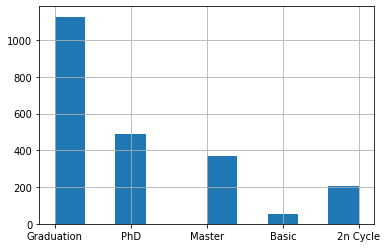

In [ ]:
df['Education'].hist()

In [ ]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

#### Eğitim ve Gelir Durumu İlişkisi

In [ ]:
gf = df.groupby('Education')
pd.DataFrame(gf.mean()['Income']) 

,Income
Education,
2n Cycle,47633.190000
Basic,20306.259259
Graduation,51984.259817
Master,52630.368587
PhD,55284.446069


In [ ]:
gf = df.groupby('Education')
pd.DataFrame(gf.mean()['Age'])  #dogrusal cıktı gercekten

,Age
Education,
2n Cycle,49.625616
Basic,44.537037
Graduation,52.364685
Master,55.121622
PhD,55.888889


In [ ]:
pd.DataFrame((df['Age'], df['Education'])).T

,Age,Education
0,65,Graduation
1,68,Graduation
2,57,Graduation
3,38,Graduation
4,41,PhD
...,...,...
2235,55,Graduation
2236,76,PhD
2237,41,Graduation
2238,66,Master


In [ ]:
gf = df.groupby('Education')
pd.DataFrame(gf.mean()['Children']) 

,Children
Education,
2n Cycle,0.886700
Basic,0.722222
Graduation,0.938776
Master,0.989189
PhD,1.000000


In [ ]:
gf = df.groupby('Education')
pd.DataFrame(gf.mean()['MntGoldProds']) 


,MntGoldProds
Education,
2n Cycle,46.399015
Basic,22.833333
Graduation,50.849157
Master,40.397297
PhD,32.310700


### Marital Status

*   yalnız veya değil olarak 2 sınıfa indirilebilir ++
*   kişi sayısına bakarak gelir bölünmesi veya değerlendirmesi (bu aynı zamanda çocuk sayısıyla da toplanabilir) ++
*   


In [ ]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [ ]:
def singularity(text):
  if text in ['Single', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO']:
    return "without partner"
  else:
    return "with partner"

In [ ]:
df['Marital_Status']=df['Marital_Status'].apply(singularity)

In [ ]:
AddOne=[]
for i in df['Marital_Status']:
  if i=='with partner':
    AddOne.append(1)
  else:
    AddOne.append(0)


In [ ]:
df['Income_Per_Person']=df['Income'] /(df['Children']+AddOne+1) #0' BÖLMEMEK İCİN

In [ ]:
df.groupby('Education').mean()['Income_Per_Person'] #kisi basına dusen gelir miktarları

Education
2n Cycle      22898.240993
Basic          9247.614198
Graduation    25032.379247
Master        24992.194645
PhD           26218.634191
Name: Income_Per_Person, dtype: float64

### Income

*    gelir --> dar gelirli, orta, zengin vs. şeklinde sınıflandırılabilir++
*    eğitim seviyesi ve gelir arasındaki korelasyon +++
*    gelir seviyesi ve çocuk sayısı doğrusal mı ters mi orantılı (düşük gelirli çok mu çocuk yapar?) ++
*    genel olarak alışveriş yapma miktarı ile gelir arasında pozitif korelasyon var mı?++
*    şarap, et ve balık geliri yüksek olanlarca daha mı çok alınır? 
*    geliri yüksek olanların yatırım yapma oranları
*    dar gelirli olanlar mı daha çok indirim/kampanya kullanır?
*

In [ ]:
df['Income'].max()

113734.0

In [ ]:
df['Income'].min()

1730.0

In [ ]:
(df['Income'].max()-df['Income'].min())/3

37334.666666666664

In [ ]:
def Income_Level(income):
  if income<= 37334:
    return "low_income"
  elif income>37334 and income<=74668:
    return "middle_income" 
  else:
    return "rich"


In [ ]:
df['Income_Level']=df['Income'].apply(Income_Level)

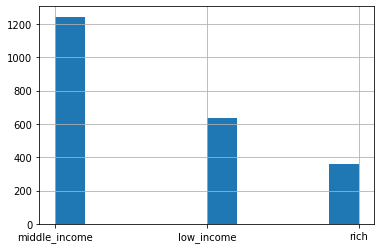

In [ ]:
df['Income_Level'].hist()

In [ ]:
df.groupby('Income_Level').mean()['Children'] 

Income_Level
low_income       1.099057
middle_income    1.061093
rich             0.305556
Name: Children, dtype: float64

In [ ]:
df['NumberofShopping']= df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']
df['Spending']= df['MntWines']+df['MntSweetProducts']+df['MntFruits']+df['MntProtein']+df['MntGoldProds']

In [ ]:
df.groupby('Income_Level').mean()['Spending'] 

Income_Level
low_income         88.061321
middle_income     628.660772
rich             1441.463889
Name: Spending, dtype: float64

In [ ]:
df.groupby('Income_Level').mean()['MntWines']

Income_Level
low_income        26.246855
middle_income    339.698553
rich             670.938889
Name: MntWines, dtype: float64

In [ ]:
df.groupby('Income_Level').mean()['MntProtein']

Income_Level
low_income        32.630503
middle_income    188.245981
rich             564.150000
Name: MntProtein, dtype: float64

In [ ]:
df.groupby('Income_Level').mean()['MntSweetProducts']

Income_Level
low_income        5.971698
middle_income    25.701768
rich             69.027778
Name: MntSweetProducts, dtype: float64

In [ ]:
df.groupby('Income_Level').mean()['MntGoldProds']

Income_Level
low_income       17.294025
middle_income    49.423633
rich             72.575000
Name: MntGoldProds, dtype: float64

In [ ]:
df.groupby('Income_Level').mean()['AcceptedCmp'] 


Income_Level
low_income       0.086478
middle_income    0.217846
rich             0.947222
Name: AcceptedCmp, dtype: float64

### Kidhome - Teenhome

*   bu iki kolon toplanabilir ++
*   gelir / evdeki kişi sayısı analizi yapılabilir --> kişi başına düşen gelir miktarı++
*   partnersiz ve çocuk sahibi ise daha mı çok yatırım yapar
*   partneri olmayanlar şaraba düşer mi :D
*

In [ ]:
df['Marital_Status']=="without partner" 


0        True
1        True
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237     True
2238    False
2239    False
Name: Marital_Status, Length: 2240, dtype: bool

In [ ]:
df[[(df['Marital_Status']=="without partner")[i] and (df['Children']!=0)[i] for i in range(len(df))]]['MntGoldProds'].mean()

37.404059040590404

In [ ]:
df[[(df['Marital_Status']=="with partner")[i] and (df['Children']!=0)[i] for i in range(len(df))]]['MntGoldProds'].mean() 

35.29150943396226

In [ ]:
df.groupby('Marital_Status').mean()['MntWines'] 

Marital_Status
with partner       302.430748
without partner    306.665829
Name: MntWines, dtype: float64

### Date Customer

*    daha önceden kaydolanlar daha mı çok alışveriş yapar?
*    

In [ ]:
df['Passed_Time']

0       3398
1       2848
2       3047
3       2874
4       2896
        ... 
2235    3116
2236    2754
2237    2890
2238    2891
2239    3357
Name: Passed_Time, Length: 2240, dtype: int64

In [ ]:
df['Spending']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Spending, Length: 2240, dtype: int64

In [ ]:
df['Spending'].corr(df['Passed_Time']) 

0.15881361486771486

### Recency

*   Uzun süredir alışveriş yapmayanların kampanya kullanım miktarı daha mı fazla?
*   Yorum olarak uzun süredir alışveriş yapmayan kişinin önüne daha çok kampanya çıkarılabilir
*




In [ ]:
df['Recency'].corr(df['AcceptedCmp']) 

-0.012569712889548952

In [ ]:
df.groupby('Response').mean()['Recency'] # son kampanyayı kabul edenler ortalama 35 gün önce son alışverişini yaparken etmeyenler ortalama 51 gün önce yapmış
# daha sık alışveriş yapanlar kampanyaları da daha çok kabul ediyor diyebiliriz

Response
0    51.514690
1    35.383234
Name: Recency, dtype: float64

### Complain

*    yaşlılar daha mı huysuz? ++
*    hangi yaş grubu daha fazla şikayet ediyor?++
*    hangi gelir grubu daha fazla şikayet ediyor?44
*    hangi eğitim durumundakiler dshsa fazla şikayet ediyor44
   

In [ ]:
df.groupby('Youth').sum()['Complain']

Youth
adult           9
middle_aged     1
old            10
young           1
Name: Complain, dtype: int64

In [ ]:
df.groupby('Income_Level').sum()['Complain'] 

Income_Level
low_income        6
middle_income    13
rich              2
Name: Complain, dtype: int64

In [ ]:
df.groupby('Education').sum()['Complain']

Education
2n Cycle       4
Basic          0
Graduation    14
Master         2
PhD            1
Name: Complain, dtype: int64

### (Şarap) (Meyve) (Et-Balık) (Tatlı) (Altın/Yatırım)
*    yaşlı kişilerin tatlı alma miktarlarına bakılabilir(kolestrol)++
*    alkol - meyve - protein - tatlı - yatırım olarak ayrılabilir ++
*    yaşlıların alkol tüketimi daha mı az? ++
*    bu markette hangi ürün daha çok tüketiliyor
*

In [ ]:
df.groupby('Youth').mean()['MntWines']  #yaşlılar daha cok alkole para harcamış

Youth
adult          241.039735
middle_aged    309.001613
old            379.822604
young          357.133333
Name: MntWines, dtype: float64

In [ ]:
df.groupby('Youth').mean()['MntSweetProducts'] #gençler daha cok tatlı almış yaşlıların kolestrolü olabilir???

Youth
adult          25.927152
middle_aged    25.474194
old            29.536481
young          46.066667
Name: MntSweetProducts, dtype: float64

In [ ]:
df

,ID,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,AcceptedCmp,MntProtein,Age,Youth,Children,Passed_Time,Income_Per_Person,Income_Level,NumberofShopping,Spending
0,5524,Graduation,without partner,58138.0,58,635,88,88,88,3,8,10,4,7,0,1,0,718,65,old,0,3398,58138.000000,middle_income,22,1617
1,2174,Graduation,without partner,46344.0,38,11,1,1,6,2,1,1,2,5,0,0,0,8,68,old,2,2848,15448.000000,middle_income,4,27
2,4141,Graduation,with partner,71613.0,26,426,49,21,42,1,8,2,10,4,0,0,0,238,57,middle_aged,0,3047,35806.500000,middle_income,20,776
3,6182,Graduation,with partner,26646.0,26,11,4,3,5,2,2,0,4,6,0,0,0,30,38,adult,1,2874,8882.000000,low_income,6,53
4,5324,PhD,with partner,58293.0,94,173,43,27,15,5,5,3,6,5,0,0,0,164,41,adult,1,2896,19431.000000,middle_income,14,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,with partner,61223.0,46,709,43,118,247,2,9,3,4,5,0,0,0,224,55,middle_aged,1,3116,20407.666667,middle_income,16,1341
2236,4001,PhD,with partner,64014.0,56,406,0,0,8,7,8,2,5,7,0,0,1,30,76,old,3,2754,12802.800000,middle_income,15,444
2237,7270,Graduation,without partner,56981.0,91,908,48,12,24,1,2,3,13,6,0,0,1,249,41,adult,0,2890,56981.000000,middle_income,18,1241
2238,8235,Master,with partner,69245.0,8,428,30,30,61,2,6,5,10,3,0,0,0,294,66,old,1,2891,23081.666667,middle_income,21,843


### İndirimli Alışveriş Sayısı (NumDealsPurchases)

*    gelir düzeyinin indirim kullanma miktarı ile korelasyonu 
*    

In [ ]:
df['Income'].corr(df['AcceptedCmp']) #yüksek gelirliler daha cok kampanya kabuleder

0.38645969004037944

In [ ]:
df['Income_Level']

0       middle_income
1       middle_income
2       middle_income
3          low_income
4       middle_income
            ...      
2235    middle_income
2236    middle_income
2237    middle_income
2238    middle_income
2239    middle_income
Name: Income_Level, Length: 2240, dtype: object

### Web Sitesi / Katalog / Doğrudan Mağaza

*  gitme - gitmeme olarak ayrılabilir
*  yaş gruplarına göre mağazaya gitme oranları++
*  çocuk sayısı ile mağazaya gitme arasında korelasyon var mı?++
*  

In [ ]:
df.groupby('Youth').mean()['NumStorePurchases'] #adult ve middle aged'ler calisiyor olabilir bu yüzden magazaya gitmeye vaklitleri olmuyor olabilir fakat old ve youngların daha cok bos vakti oldugu icin magazaya gidebilirler diye yorumladım

Youth
adult          5.294702
middle_aged    5.746774
old            6.454936
young          6.533333
Name: NumStorePurchases, dtype: float64

In [ ]:
df.groupby('Children').mean()['NumStorePurchases'] #hiç çocugu olmayanlar daha cok alışverişe doğrudan gidiyor ve bunlar arasında bir ilişki olduğu görüldü

Children
0    7.264890
1    5.593972
2    4.311164
3    3.962264
Name: NumStorePurchases, dtype: float64

### Web Sitesine Ziyaret Sayısı

*    (ziyaret sayısı / satın alma sayısı) analizi --> web sitesinde alışveriş yapılma oranı
*    çocuğu olan yaşlılar ve çocuğu olmayan yaşlıların internet kullanma miktarları karşılaştırılabilir
*    partneri varsa mağazaya gitme oranı arasında korelasyon var mı? (iş bölümü)++

In [ ]:
df.groupby('Marital_Status').sum()['NumStorePurchases'] 

Marital_Status
with partner       8382
without partner    4588
Name: NumStorePurchases, dtype: int64

In [ ]:
df.groupby('Marital_Status').sum()['NumWebPurchases'] #partneri olup olmamasıyla alışverişi doğrudan veya uzaktan yapma arasında bir ilişki bulunamadı

Marital_Status
with partner       5899
without partner    3251
Name: NumWebPurchases, dtype: int64

In [ ]:
df['NumWebVisitsMonth'].sum()/df['NumWebPurchases'].sum() # web sitesine girmeyle alışveriş yapma arasındaki ilişkiyi bulmaya calıstım??

1.3015300546448088

In [ ]:
df[[(df['Youth']=="old")[i] and (df['Children']>0)[i] for i in range(len(df))]]['NumWebVisitsMonth'].mean()

5.584615384615384

In [ ]:
df[[(df['Youth']=="old")[i] and (df['Children']==0)[i] for i in range(len(df))]]['NumWebVisitsMonth'].mean() #demek ki cocugu olan yaslılar daha cok internet kullanıyor

3.278688524590164

## Normalization

In [ ]:
def normalize(dataset):
    dataNorm=((dataset-dataset.min())/(dataset.max()-dataset.min()))
    return dataNorm

In [ ]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Complain', 'Response', 'AcceptedCmp',
       'MntProtein', 'Age', 'Youth', 'Children', 'Passed_Time',
       'Income_Per_Person', 'Income_Level', 'NumberofShopping', 'Spending'],
      dtype='object')

In [ ]:
df_normalized = df.copy()

In [ ]:
df_normalized['Income'] = normalize(df_normalized['Income'])

In [ ]:
df_normalized['Recency'] = normalize(df_normalized['Recency'])

In [ ]:
df_normalized['MntWines'] = normalize(df_normalized['MntWines'])

In [ ]:
df_normalized['MntFruits'] = normalize(df_normalized['MntFruits'])

In [ ]:
df_normalized['MntSweetProducts'] = normalize(df_normalized['MntSweetProducts'])

In [ ]:
df_normalized['MntGoldProds'] = normalize(df_normalized['MntGoldProds'])

In [ ]:
df_normalized['MntProtein'] = normalize(df_normalized['MntProtein'])

In [ ]:
df_normalized['Age'] = normalize(df_normalized['Age'])

In [ ]:
df_normalized['NumDealsPurchases'] = normalize(df_normalized['NumDealsPurchases'])

In [ ]:
df_normalized['NumWebPurchases'] = normalize(df_normalized['NumWebPurchases'])

In [ ]:
df_normalized['NumStorePurchases'] = normalize(df_normalized['NumStorePurchases'])

In [ ]:
df_normalized['NumWebVisitsMonth'] = normalize(df_normalized['NumWebVisitsMonth'])

In [ ]:
df_normalized['AcceptedCmp'] = normalize(df_normalized['AcceptedCmp'])

In [ ]:
df_normalized['Children'] = normalize(df_normalized['Children'])

In [ ]:
df_normalized['NumCatalogPurchases'] = normalize(df_normalized['NumCatalogPurchases'])

In [ ]:
df_normalized['Passed_Time'] = normalize(df_normalized['Passed_Time'])

In [ ]:
df_normalized['NumberofShopping'] = normalize(df_normalized['NumberofShopping'])

In [ ]:
df_normalized['Spending'] = normalize(df_normalized['Spending'])

In [ ]:
df_normalized['Income_Per_Person'] = normalize(df_normalized['Income_Per_Person'])

In [ ]:
df_normalized

,ID,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,AcceptedCmp,MntProtein,Age,Youth,Children,Passed_Time,Income_Per_Person,Income_Level,NumberofShopping,Spending
0,5524,Graduation,without partner,0.503625,0.585859,0.425318,0.442211,0.334601,0.243094,0.200000,0.296296,0.357143,0.307692,0.35,0,1,0.00,0.415411,0.609375,old,0.000000,0.948498,0.507644,middle_income,0.68750,0.639683
1,2174,Graduation,without partner,0.398325,0.383838,0.007368,0.005025,0.003802,0.016575,0.133333,0.037037,0.035714,0.153846,0.25,0,0,0.00,0.004056,0.656250,old,0.666667,0.161660,0.129583,middle_income,0.12500,0.008730
2,4141,Graduation,with partner,0.623933,0.262626,0.285332,0.246231,0.079848,0.116022,0.066667,0.296296,0.071429,0.769231,0.20,0,0,0.00,0.137312,0.484375,middle_aged,0.000000,0.446352,0.309877,middle_income,0.62500,0.305952
3,6182,Graduation,with partner,0.222456,0.262626,0.007368,0.020101,0.011407,0.013812,0.133333,0.074074,0.000000,0.307692,0.30,0,0,0.00,0.016802,0.187500,adult,0.333333,0.198856,0.071435,low_income,0.18750,0.019048
4,5324,PhD,with partner,0.505009,0.949495,0.115874,0.216080,0.102662,0.041436,0.333333,0.185185,0.107143,0.461538,0.25,0,0,0.00,0.094438,0.234375,adult,0.333333,0.230329,0.164857,middle_income,0.43750,0.165476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,with partner,0.531169,0.464646,0.474883,0.216080,0.448669,0.682320,0.133333,0.333333,0.107143,0.307692,0.25,0,0,0.00,0.129200,0.453125,middle_aged,0.333333,0.545064,0.173506,middle_income,0.50000,0.530159
2236,4001,PhD,with partner,0.556087,0.565657,0.271936,0.000000,0.000000,0.022099,0.466667,0.296296,0.071429,0.384615,0.35,0,0,0.25,0.016802,0.781250,old,1.000000,0.027182,0.106158,middle_income,0.46875,0.174206
2237,7270,Graduation,without partner,0.493295,0.919192,0.608171,0.241206,0.045627,0.066298,0.066667,0.074074,0.107143,1.000000,0.30,0,0,0.25,0.143685,0.234375,adult,0.000000,0.221745,0.497398,middle_income,0.56250,0.490476
2238,8235,Master,with partner,0.602791,0.080808,0.286671,0.150754,0.114068,0.168508,0.133333,0.222222,0.178571,0.769231,0.15,0,0,0.00,0.169757,0.625000,old,0.333333,0.223176,0.197187,middle_income,0.65625,0.332540


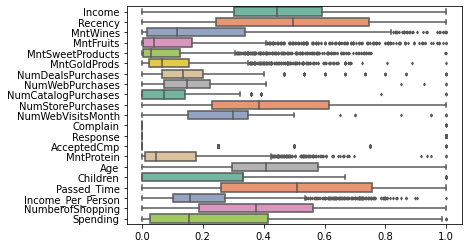

In [ ]:
import seaborn as sns
ax = sns.boxplot(data=df_normalized.drop(['ID'],axis=1), orient="h", palette="Set2",fliersize=2)

## One Hot Encoding

In [ ]:
df_normalized

,ID,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,AcceptedCmp,MntProtein,Age,Youth,Children,Passed_Time,Income_Per_Person,Income_Level,NumberofShopping,Spending
0,5524,Graduation,without partner,0.503625,0.585859,0.425318,0.442211,0.334601,0.243094,0.200000,0.296296,0.357143,0.307692,0.35,0,1,0.00,0.415411,0.609375,old,0.000000,0.948498,0.507644,middle_income,0.68750,0.639683
1,2174,Graduation,without partner,0.398325,0.383838,0.007368,0.005025,0.003802,0.016575,0.133333,0.037037,0.035714,0.153846,0.25,0,0,0.00,0.004056,0.656250,old,0.666667,0.161660,0.129583,middle_income,0.12500,0.008730
2,4141,Graduation,with partner,0.623933,0.262626,0.285332,0.246231,0.079848,0.116022,0.066667,0.296296,0.071429,0.769231,0.20,0,0,0.00,0.137312,0.484375,middle_aged,0.000000,0.446352,0.309877,middle_income,0.62500,0.305952
3,6182,Graduation,with partner,0.222456,0.262626,0.007368,0.020101,0.011407,0.013812,0.133333,0.074074,0.000000,0.307692,0.30,0,0,0.00,0.016802,0.187500,adult,0.333333,0.198856,0.071435,low_income,0.18750,0.019048
4,5324,PhD,with partner,0.505009,0.949495,0.115874,0.216080,0.102662,0.041436,0.333333,0.185185,0.107143,0.461538,0.25,0,0,0.00,0.094438,0.234375,adult,0.333333,0.230329,0.164857,middle_income,0.43750,0.165476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,with partner,0.531169,0.464646,0.474883,0.216080,0.448669,0.682320,0.133333,0.333333,0.107143,0.307692,0.25,0,0,0.00,0.129200,0.453125,middle_aged,0.333333,0.545064,0.173506,middle_income,0.50000,0.530159
2236,4001,PhD,with partner,0.556087,0.565657,0.271936,0.000000,0.000000,0.022099,0.466667,0.296296,0.071429,0.384615,0.35,0,0,0.25,0.016802,0.781250,old,1.000000,0.027182,0.106158,middle_income,0.46875,0.174206
2237,7270,Graduation,without partner,0.493295,0.919192,0.608171,0.241206,0.045627,0.066298,0.066667,0.074074,0.107143,1.000000,0.30,0,0,0.25,0.143685,0.234375,adult,0.000000,0.221745,0.497398,middle_income,0.56250,0.490476
2238,8235,Master,with partner,0.602791,0.080808,0.286671,0.150754,0.114068,0.168508,0.133333,0.222222,0.178571,0.769231,0.15,0,0,0.00,0.169757,0.625000,old,0.333333,0.223176,0.197187,middle_income,0.65625,0.332540


In [ ]:
df_model = pd.get_dummies(df_normalized)

In [ ]:
df_model = df_model.drop(['ID'],axis=1)

## KMeans

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(df_model)

KMeans(n_clusters=4)

In [ ]:
kmeans.labels_

array([3, 3, 1, ..., 3, 1, 1], dtype=int32)

In [ ]:
df['labels'] = kmeans.labels_

In [ ]:
df

,ID,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,AcceptedCmp,MntProtein,Age,Youth,Children,Passed_Time,Income_Per_Person,Income_Level,NumberofShopping,Spending,labels
0,5524,Graduation,without partner,58138.0,58,635,88,88,88,3,8,10,4,7,0,1,0,718,65,old,0,3397,58138.000000,middle_income,22,1617,3
1,2174,Graduation,without partner,46344.0,38,11,1,1,6,2,1,1,2,5,0,0,0,8,68,old,2,2847,15448.000000,middle_income,4,27,3
2,4141,Graduation,with partner,71613.0,26,426,49,21,42,1,8,2,10,4,0,0,0,238,57,middle_aged,0,3046,35806.500000,middle_income,20,776,1
3,6182,Graduation,with partner,26646.0,26,11,4,3,5,2,2,0,4,6,0,0,0,30,38,adult,1,2873,8882.000000,low_income,6,53,2
4,5324,PhD,with partner,58293.0,94,173,43,27,15,5,5,3,6,5,0,0,0,164,41,adult,1,2895,19431.000000,middle_income,14,422,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,with partner,61223.0,46,709,43,118,247,2,9,3,4,5,0,0,0,224,55,middle_aged,1,3115,20407.666667,middle_income,16,1341,1
2236,4001,PhD,with partner,64014.0,56,406,0,0,8,7,8,2,5,7,0,0,1,30,76,old,3,2753,12802.800000,middle_income,15,444,1
2237,7270,Graduation,without partner,56981.0,91,908,48,12,24,1,2,3,13,6,0,0,1,249,41,adult,0,2889,56981.000000,middle_income,18,1241,3
2238,8235,Master,with partner,69245.0,8,428,30,30,61,2,6,5,10,3,0,0,0,294,66,old,1,2890,23081.666667,middle_income,21,843,1


In [ ]:
df[df['labels'] == 0]

,ID,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,AcceptedCmp,MntProtein,Age,Youth,Children,Passed_Time,Income_Per_Person,Income_Level,NumberofShopping,Spending,labels
15,2114,PhD,without partner,82800.0,23,1006,22,68,45,1,7,6,12,3,0,1,2,174,76,old,0,3316,82800.000000,rich,25,1315,0
18,6565,Master,with partner,76995.0,91,1012,80,16,176,2,11,4,9,5,0,0,1,498,73,old,1,3192,25665.000000,rich,24,1782,0
29,1966,PhD,with partner,84618.0,96,684,100,66,0,1,6,9,10,2,0,0,1,822,57,middle_aged,0,2953,42309.000000,rich,25,1672,0
40,8601,Graduation,with partner,80011.0,3,421,76,178,102,2,8,6,5,4,0,0,0,618,42,adult,1,3160,26670.333333,rich,19,1395,0
45,1371,Graduation,without partner,79941.0,72,123,164,30,174,1,2,4,9,1,0,0,0,493,46,adult,0,2735,79941.000000,rich,15,984,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2190,4418,Master,without partner,89616.0,36,671,47,111,15,1,7,5,12,2,0,1,0,800,39,adult,0,3223,89616.000000,rich,24,1644,0
2193,8722,2n Cycle,with partner,82347.0,38,556,54,133,63,1,7,7,10,3,0,1,2,1047,65,old,0,3334,41173.500000,rich,24,1853,0
2211,10469,Graduation,with partner,88325.0,42,519,71,27,53,1,6,2,9,2,0,0,0,953,41,adult,0,2878,44162.500000,rich,17,1623,0
2213,3661,2n Cycle,without partner,80617.0,42,594,51,55,32,1,4,6,8,2,0,0,0,703,27,young,0,3359,80617.000000,rich,18,1435,0


In [ ]:
df[df['labels'] == 0]['Income_Level'].value_counts()

rich    307
Name: Income_Level, dtype: int64

In [ ]:
df[df['labels'] == 1]['Income_Level'].value_counts()

middle_income    788
Name: Income_Level, dtype: int64

In [ ]:
df[df['labels'] == 2]['Income_Level'].value_counts()

low_income    707
Name: Income_Level, dtype: int64

In [ ]:
df[df['labels'] == 3]['Income_Level'].value_counts()

middle_income    437
low_income         1
Name: Income_Level, dtype: int64

In [ ]:
df['labels'].value_counts()

1    788
2    707
3    438
0    307
Name: labels, dtype: int64